# <b>Statistcal Analyses of the Participants' Data</b>
<br>
The following code computes statistical information and calculates metrics to measure the reliability of each participant, as well as the success of the phrase detection algorithm.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys

Load the "squash.csv" file, which contains each participant's data for each stimulus all in one file

In [2]:
data = pd.read_csv("squash.csv")

## Visualize the data

Look at the first five lines

In [3]:
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,12.440676,12.639807,10.896421,9.849563,5.349503,5.389136,6.527361,6.473224,23.059296,38.508334,10.161832,9.880329,25.886552,25.826727,11.633643,24.028560,23.763999,24.315200,34.231317,34.218165
1,27.139909,27.404654,13.179512,18.467137,9.715871,9.806778,12.575475,12.423707,36.051019,64.107683,34.240482,19.663830,37.801020,37.958059,23.416039,45.395041,50.328252,49.680559,43.397244,83.630416
2,42.993334,43.102829,15.063049,23.650109,15.015314,14.919986,17.842205,18.956122,63.562762,75.440590,60.506893,24.547872,52.267965,52.106429,40.465009,60.676565,75.692786,76.528222,59.329580,7.708452
3,57.037504,57.036317,28.012461,28.150118,25.116422,33.404117,27.609059,27.671644,78.732278,134.869303,95.520714,35.662427,56.935690,56.890597,61.262266,70.725352,3.259511,0.631593,83.162935,12.808419
4,70.936573,71.201276,49.241924,43.899086,33.448359,40.469569,33.908196,33.821432,102.844903,19.625722,4.896373,65.178244,61.818633,61.773023,71.194715,111.471464,7.675102,3.331237,1.576442,19.123541


Create a list of column names for iteration of the data

In [4]:
stimuli = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19']

Since the squashed data is not organized in ascending order, we need to sort it and drop the nan values.

In [5]:
sort = data.sort_values(stimuli)

#drop nan values
for i in range(len(stimuli)):
    column = sort[stimuli[i]]
    column = column.replace(0, np.nan) #eliminate extraneous zeros
    column = column.dropna(how='all', axis=0) #drop nan values
    sort.insert(i, i+20, column, False) #insert the column containing no nan values

#reorganize dataframe columns by stimuli identifier
sort = sort.drop(sort[stimuli], axis=1)
for i in range(len(stimuli)):
    sort = sort.rename(columns={(i+len(stimuli)) : i})

Show summary statistics for the sorted, nan-free data:

In [6]:
sort.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
count,105.000000,108.000000,145.000000,151.000000,109.000000,119.000000,203.000000,268.000000,107.000000,94.000000,136.000000,150.000000,118.000000,118.000000,140.000000,173.000000,110.000000,111.000000,76.000000,105.000000
mean,56.608792,56.935811,43.686810,43.230863,37.159531,37.406707,69.332693,70.878450,77.302722,76.742385,49.521143,49.717662,56.349689,56.154729,63.739823,64.384677,42.486479,38.955334,50.855019,50.030755
std,29.179460,29.200780,24.022039,23.931613,20.502617,20.188056,44.416677,43.469767,37.312752,35.531372,30.886698,31.771288,20.226246,20.124537,34.277542,31.367564,21.014249,21.900541,25.011682,24.423264
min,11.924949,12.113265,5.692099,3.530363,5.085682,3.640436,0.354522,0.298719,2.307089,19.092045,3.759907,3.193040,10.703033,5.348987,9.224742,0.369929,3.098278,0.631593,1.576442,5.587425
25%,27.317591,27.486238,23.273848,23.255209,15.277739,17.082780,27.580843,32.953899,39.717731,44.918865,19.782124,19.652401,38.657916,37.920776,34.784313,39.840591,23.808221,22.958298,32.773209,32.202683
50%,56.835936,56.948155,44.174728,44.263269,40.332632,40.365519,70.216263,69.910877,76.718343,75.113764,44.368835,44.187335,57.897333,57.026033,61.158088,60.676565,43.742237,37.750765,46.178315,46.892700
75%,85.373835,85.350155,59.737220,60.288348,51.110128,51.240736,111.025372,110.917839,103.369149,103.620554,81.796568,81.730102,71.567973,71.521064,96.950700,90.591529,60.325287,56.722143,78.244491,75.064953
max,102.160253,101.059125,84.320905,84.201348,72.905029,73.663270,143.544367,143.938397,139.500392,137.308953,103.399214,103.054238,86.184881,86.198102,118.122117,119.517539,76.624880,76.735280,89.416809,89.343466


Plot the sorted data altogether onto boxplots for another perspective in visualizing the distribution.

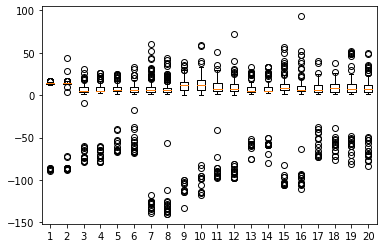

In [7]:
phrase_matrix = [] #used to hold phrase lengths for each stimulus

for i in range(len(stimuli)): #copied for-loop from phrase length algorithm
    column = sort[i]
    s_local_dist = []
    s_local_dist.append(column[0])
    for j in range(0, len(column)-1):
        if column[j+1] > 0: #do not consider missing values
            s_local_dist.append(column[j+1] - column[j])
    phrase_matrix.append(s_local_dist) #append lists of phrase lengths to matrix

plot = plt.boxplot(phrase_matrix)

#doesn't do a great job of describing data

Plot the sorted data with histograms, by stimulus.
<br>
Now we visually describe the distributions.
<br>
The height of the bins indicate how many phrases were marked within that time interval. In this case, the time interval is three seconds.
<br>
The bins that have heights greater than an arbitrary threshold (let's say 5), indicate that the phrase marking is commonly agreed upon.

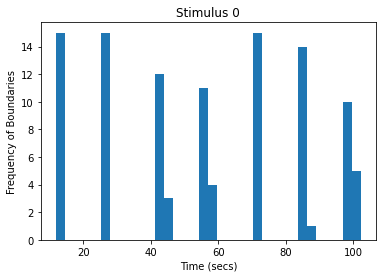

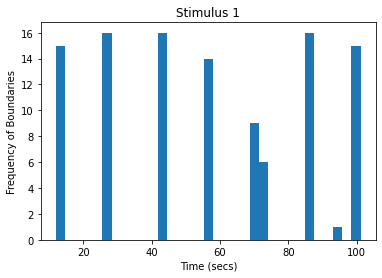

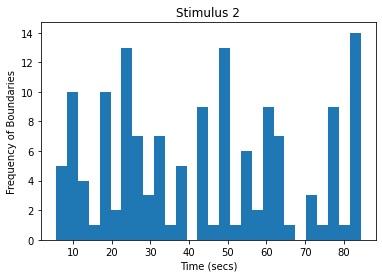

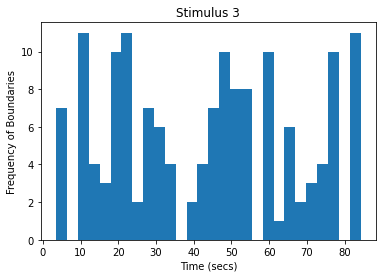

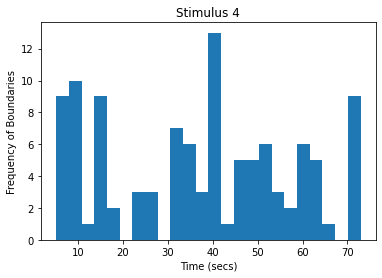

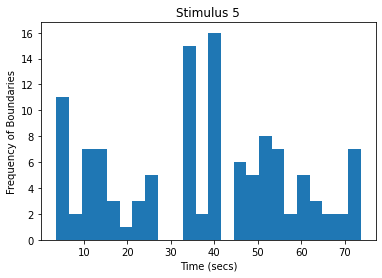

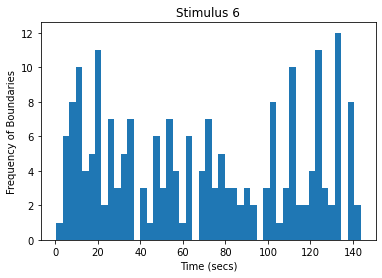

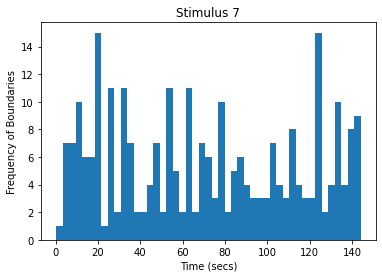

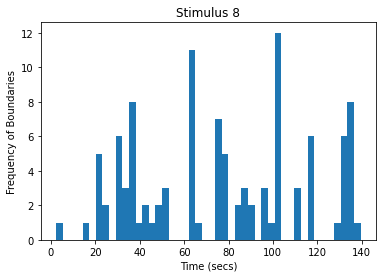

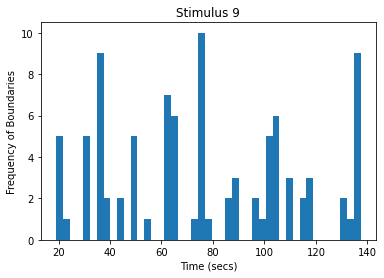

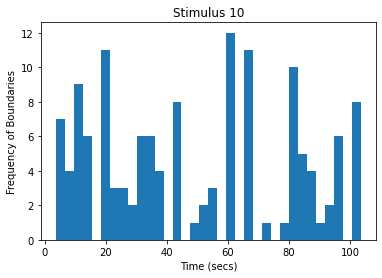

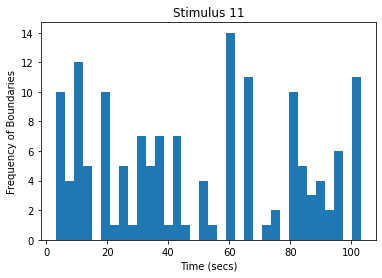

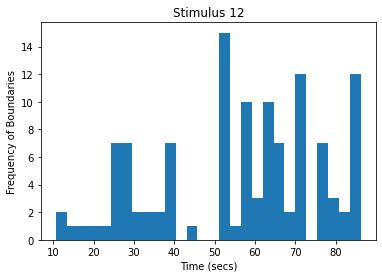

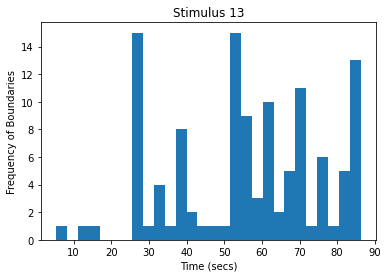

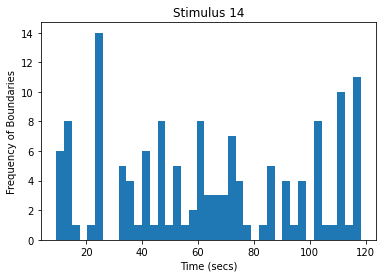

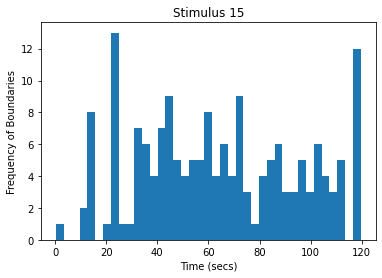

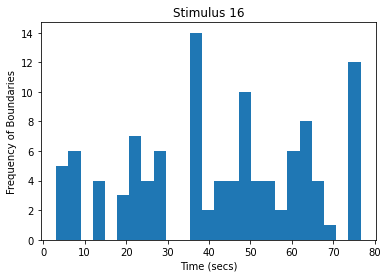

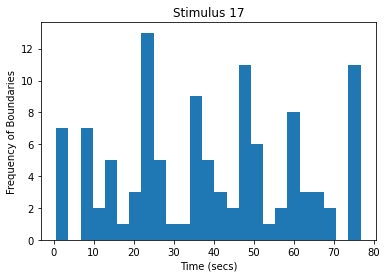

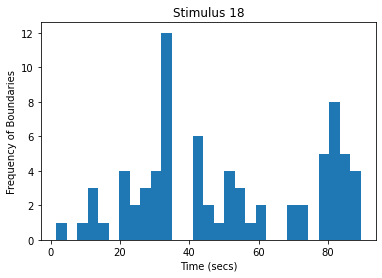

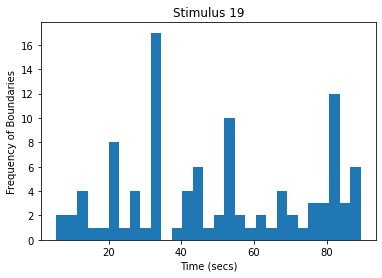

In [8]:
for i in range(len(stimuli)):
    column = sort[i]
    column = column.dropna(how='all', axis=0) #assert no nans present
    plt.figure()
    column.plot.hist(bins=(int(max(column)/3)), histtype='stepfilled') #max(column) is the last mark of the stimulus
    plt.title("Stimulus " + str(i))
    plt.xlabel('Time (secs)')
    plt.ylabel('Frequency of Boundaries')

Plot the probability denisty histograms from the sorted data, by stimulus.<br>
The height of the bins indicate the probability that the time(x) is a phrase boundary.

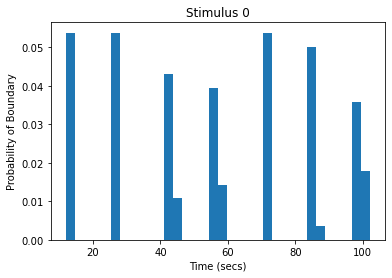

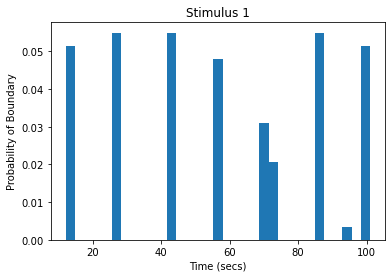

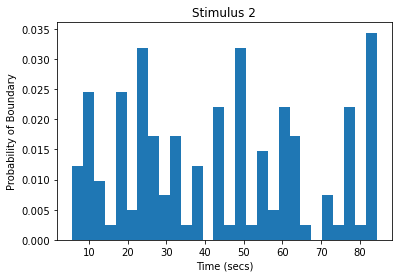

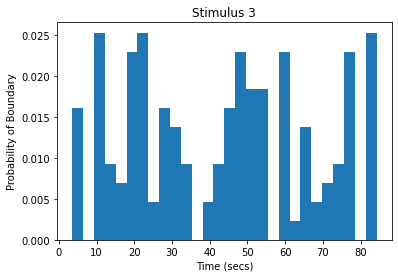

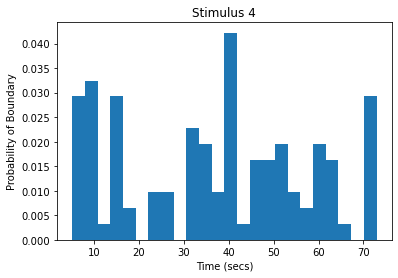

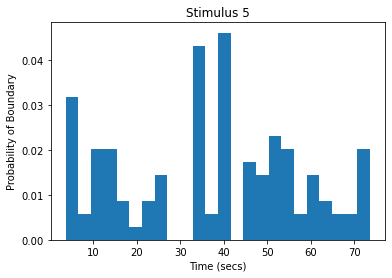

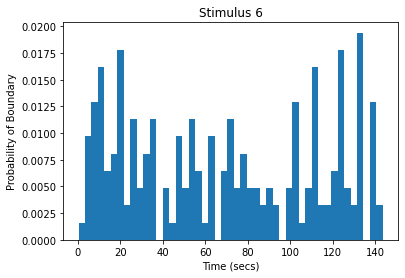

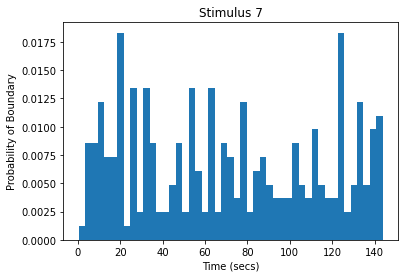

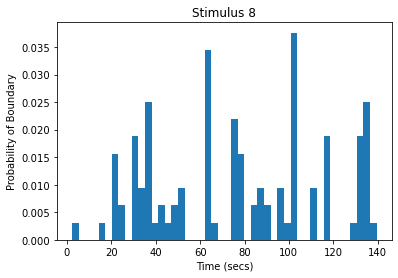

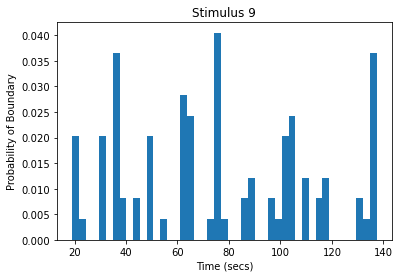

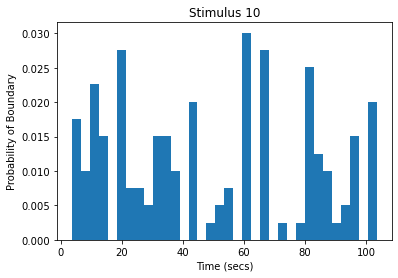

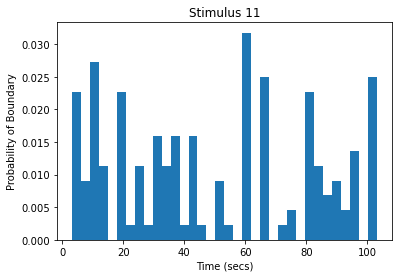

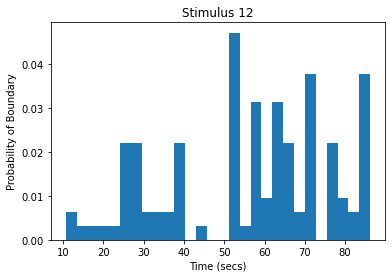

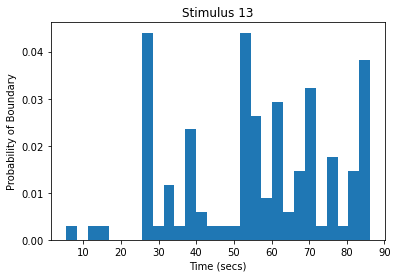

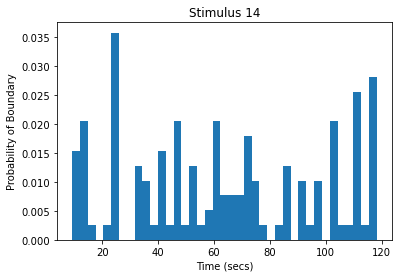

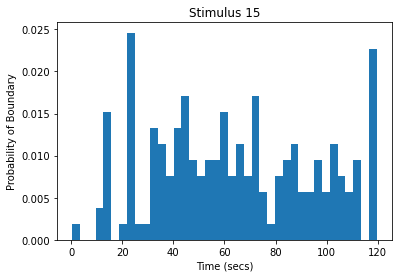

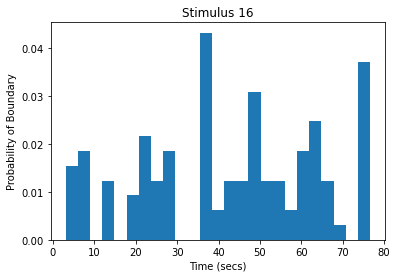

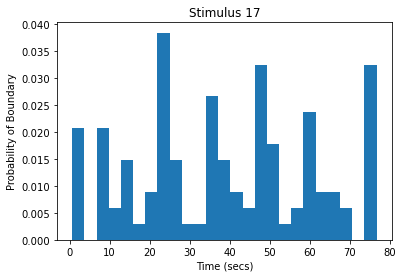

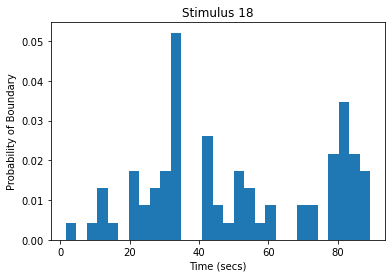

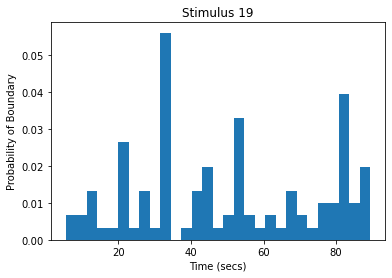

In [9]:
for i in range(len(stimuli)):
    column = sort[i]
    column = column.dropna(how='all', axis=0) #assert no nans present
    plt.figure()
    column.plot.hist(bins=(int(max(column)/3)), density=True, histtype='stepfilled', stacked=True) #probabilities
    plt.title("Stimulus " + str(i))
    plt.xlabel('Time (secs)')
    plt.ylabel('Probability of Boundary')

Below are the Precision/Recall F1 Scores for each participant, written in a list, then converted into a Pandas DataFrame.

In [10]:
f1_scores = [0.7463, 0.8190, 0.8251, 0.7203, 0.7729, 0.7218, 0.6429, 0.7581, 0.7723, 0.8092, 0.7640, 0.7891, 0.7389, 0.7010, 0.7069]

In [11]:
f1_scores_df = pd.DataFrame(f1_scores,columns=['Scores'])

Here, summary statistics for the participants' F1 scores are shown.<br><br>
The best, mid, and worst participant's:
<ul>
<li>Maximum f1_score is 0.8251 -- participant 3
<li>Median f1_score is 0.7581 -- participant 8
<li>Minimum f1_score is 0.6429 -- participant 7
</ul>
<br>
The standard deviation from the mean F1 score is 0.049401 -- the participants did not vary significantly.<br>
The variance is 0.0024404588.

In [12]:
f1_scores_df.describe()

,Scores
count,15.000000
mean,0.752520
std,0.049401
min,0.642900
25%,0.721050
50%,0.758100
75%,0.781000
max,0.825100


This can be can seen when the DataFrame is sorted in ascending order of each participant's f1_score.

In [13]:
f1_scores_df_sorted = f1_scores_df.sort_values('Scores')
f1_scores_df_sorted

,Scores
6,0.6429
13,0.7010
14,0.7069
3,0.7203
5,0.7218
12,0.7389
0,0.7463
7,0.7581
10,0.7640
8,0.7723


## Compute quantitative descriptions of the data

The computation below finds the average phrase lengths for each participant and stimuli.
<br><br>
The averages found:<br>
<ul>
<li>Each participant's average phrase length for each stimulus</li>
<li>Each participant's total average phrase length, considering every stimulus</li>
<li>The total average phrase length of each stimulus, considering every participant</li>
<li>The total average phrase length, considering every participant and every stimulus</li>
</ul>
<br>
The standard deviations found:<br>
<ul>
<li>Each participant's standard deviation of phrase lengths for each stimulus</li>
<li>Each participant's total standard deviation of phrase lengths, considering every stimulus</li>
<li>The total standard deviation of phrase lengths of each stimulus, considering every participant</li>
<li>The total standard deviation of phrase lengths, considering every participant and every stimulus</li>
</ul>
The variances found:<br>
<ul>
<li>Each participant's variance of phrase lengths for each stimulus</li>
<li>Each participant's total variance of phrase lengths, considering every stimulus</li>
<li>The total variance of phrase lengths of each stimulus, considering every participant</li>
<li>The total variance of phrase lengths, considering every participant and every stimulus</li>
</ul>

In [14]:
#participants' data
data1 = pd.read_csv("participant1_marks.csv")
data2 = pd.read_csv("participant2_marks.csv")
data3 = pd.read_csv("participant3_marks.csv")
data4 = pd.read_csv("participant4_marks.csv")
data5 = pd.read_csv("participant5_marks.csv")
data6 = pd.read_csv("participant6_marks.csv")
data7 = pd.read_csv("participant7_marks.csv")
data8 = pd.read_csv("participant8_marks.csv")
data9 = pd.read_csv("participant9_marks.csv")
data10 = pd.read_csv("participant10_marks.csv")
data11 = pd.read_csv("participant11_marks.csv")
data12 = pd.read_csv("participant12_marks.csv")
data13 = pd.read_csv("participant13_marks.csv")
data14 = pd.read_csv("participant14_marks.csv")
data15 = pd.read_csv("participant15_marks.csv")
data16 = pd.read_csv("participant16_marks.csv")
part_data = [data1, data2, data3, data4, data5, data6, data7, data8,
             data9, data10, data11, data12, data13, data14, data15, data16]

In [15]:
stimulus_asv = [] #used to find average phrase length, standard deviation, and variance for each stimulus
total = [] #used to find total average phrase length, standard deviation, and variance for every participant/stimulus

#loops through each participant's whole data
print("Averages, Standard Deviations, and Variances for every participant and every stimulus\n---\n")
for s in range(len(part_data)):
    print("Participant", s+1, ":")
    dat = part_data[s]
    s_asv = [] #used to find particular participant's average phrase length, standard deviation, and variance for each stimulus
        
    #loops through each stimulus for each participant
    for i in range(0, len(stimuli)):
        column = dat[stimuli[i]] #column is all phrase markings from stimulus i
        column = column.replace(0, np.nan) #replace extraneous zeros with nan values
        column = column.dropna(how='all', axis=0) #drop nan values
        s_local_dist = [] #used to find distances between each datum
            
        #condition to assert that the column is not empty (i.e. no nans or zeros)
        if len(column) > 0:
            s_local_dist.append(column[0])
                
            #loops through each column of each stimulus
            for j in range(0, len(column)-1):
                if column[j+1] > 0: #do not consider missing values
                    s_local_dist.append(column[j+1] - column[j]) #distance between two data
                
            #average phrase length for this participant/stimulus
            s_asv.append(sum(s_local_dist)/len(s_local_dist)) #append this local distance average to s_asv
            total.append(sum(s_local_dist)/len(s_local_dist)) #append this local distance to total
            print("Stimulus", i, "Average:", s_asv[i])
        elif len(column) == 0:
            s_asv.append(np.nan) #if no data in column, ignore
            print("Stimulus", i, ":", "Average unknown")
    
    #append the averages of participant s to list
    stimulus_asv.append(s_asv) #list of lists
    
    #prints average phrase length for each participant
    if len(s_asv) != 0:
        s_asv = [x for x in s_asv if str(x) != 'nan'] #drops nans to clean list
        part_avg = sum(s_asv)/len(s_asv) #find average phrase length for each participant
        part_std = np.std(s_asv)
        part_var = np.var(s_asv)
    
    print("Participant", s+1, "Average:", part_avg)
    print("Participant", s+1, "Standard Deviation:", part_std)
    print("Participant", s+1, "Variance:", part_var, "\n")
    
    
#prints averages and standard deviations for every stimuli's phrase length
print("\n---\nAverages, Standard Deviations, and Variances for every stimulus, considering every participant\n---\n")
for a in range(len(stimuli)): #loop through all stimuli
    stimulus_aux_asv = [] #holds all participants' average, sd, and var of phrase lengths for each stimulus
    for b in range(len(stimulus_asv)): #loop through each participant
        stimulus_aux_asv.append(stimulus_asv[b][a]) #appends average for each participants' average for stimulus a
        stimulus_aux_asv = [v for v in stimulus_aux_asv if str(v) != 'nan'] #drops nans to clean list
        
        #find the average phrase length given each participants' average phrase lengths on stimulus a
        avg = sum(stimulus_aux_asv)/len(stimulus_aux_asv)
    
    print(len(stimulus_aux_asv))
    std = np.std(stimulus_aux_asv)
    var = np.var(stimulus_aux_asv)
            
    #print format to display the averages and standard deviations of phrase lengths for each stimulus
    print("Stimulus", a, "Average:", avg, ":: Standard Deviation:", std, ":: Variance:", var)


#get total average of every phrase length found in the above computation
total_avg = sum(total)/len(total)

#get total standard deviation for every phrase length found in the above computation
total_std = (np.std(total))

#get total variance for every phrase length found in the above computation
total_var = (np.var(total))

#print format for results
print("\n---\nTotal Average for every participant/stimulus:", total_avg)
print("Total Standard Deviation for every participant/stimulus:", total_std)
print("Total Variance for every participant/stimulus:", total_var)

Averages, Standard Deviations, and Variances for every participant and every stimulus
---

Participant 1 :
Stimulus 0 Average: 14.207509542857142
Stimulus 1 Average: 14.204618985714287
Stimulus 2 Average: 9.317469388888888
Stimulus 3 Average: 8.40781368
Stimulus 4 Average: 8.863924775000001
Stimulus 5 Average: 8.0123604
Stimulus 6 Average: 11.619468525000002
Stimulus 7 Average: 11.696901791666667
Stimulus 8 Average: 19.310796900000003
Stimulus 9 Average: 33.71732585
Stimulus 10 Average: 23.88017845
Stimulus 11 Average: 11.9051755375
Stimulus 12 Average: 10.7706696
Stimulus 13 Average: 11.593449171428572
Stimulus 14 Average: 15.941464299999998
Stimulus 15 Average: 22.29429286
Stimulus 16 Average: 25.230928633333335
Stimulus 17 Average: 25.5094072
Stimulus 18 Average: 20.7907338
Stimulus 19 Average: 41.81520820000001
Participant 1 Average: 17.454484879569446
Participant 1 Standard Deviation: 8.87125973221457
Participant 1 Variance: 78.69924923641172 

Participant 2 :
Stimulus 0 Average: 

Stimulus 16 Average: 14.824567819999999
Stimulus 17 Average: 14.74382584
Stimulus 18 Average: 12.540515428571428
Stimulus 19 Average: 10.9852838375
Participant 10 Average: 12.319121582446115
Participant 10 Standard Deviation: 3.5821687720012245
Participant 10 Variance: 12.831933111100762 

Participant 11 :
Stimulus 0 Average: 14.5943218
Stimulus 1 Average: 25.264781325
Stimulus 2 Average: 10.5401130875
Stimulus 3 Average: 16.78227592
Stimulus 4 Average: 18.078176525
Stimulus 5 Average: 24.13106253333333
Stimulus 6 Average: 17.5329458625
Stimulus 7 Average: 12.824642672727276
Stimulus 8 : Average unknown
Stimulus 9 Average: 22.712422266666664
Stimulus 10 Average: 14.498187685714285
Stimulus 11 Average: 17.05250315
Stimulus 12 Average: 26.152087433333335
Stimulus 13 Average: 28.732700766666664
Stimulus 14 Average: 23.6244233
Stimulus 15 Average: 29.584014075000002
Stimulus 16 Average: 38.31244
Stimulus 17 Average: 19.075462525
Stimulus 18 Average: 42.18274905
Stimulus 19 Average: 28.6651

The computation below finds the number of phrases boundaries per minute for each excerpt.

In [16]:
#time in seconds of each stimulus
s0 = 100
s1 = 83
s2 = 73
s3 = 146
s4 = 136
s5 = 101
s6 = 85
s7 = 117
s8 = 75
s9 = 89

total_secs = [s0, s1, s2, s3, s4, s5, s6, s7, s8, s9] #times in seconds for every stimulus
count = 0 #counter for every phrase marked

#triple-nested for loops to iterate (and count) every phrase marking
#loop through every participant
for s in range(len(part_data)):
    dat = part_data[s]
    count_loc = 0
    #loop through every stimulus
    for i in range(len(stimuli)):
        column = dat[stimuli[i]] #column is all phrase markings from stimulus i
        column = column.replace(0, np.nan) #replace extraneous zeros with nan values
        column = column.dropna(how='all', axis=0) #drop nan values
        
        #loop through every marking
        
        for j in range(len(column)):
            count += 1 #increment counter
            count_loc += 1 #used for each stimulus
    stim_min = []
    for k in range(len(total_secs)):
        mins = count_loc / ((total_secs[k]/60)*len(part_data))
        stim_min.append(mins)

for l in range(len(stim_min)):
    print("Phrases Per Minute for Excerpt", l, ":", stim_min[l])

Phrases Per Minute for Excerpt 0 : 4.7625
Phrases Per Minute for Excerpt 1 : 5.7379518072289155
Phrases Per Minute for Excerpt 2 : 6.523972602739726
Phrases Per Minute for Excerpt 3 : 3.261986301369863
Phrases Per Minute for Excerpt 4 : 3.5018382352941178
Phrases Per Minute for Excerpt 5 : 4.715346534653465
Phrases Per Minute for Excerpt 6 : 5.602941176470588
Phrases Per Minute for Excerpt 7 : 4.07051282051282
Phrases Per Minute for Excerpt 8 : 6.35
Phrases Per Minute for Excerpt 9 : 5.351123595505618


## The Phrase Detection Algorithm

Load data from the phrase detection algorithm

In [17]:
intensity = pd.read_csv("intensity_marks.csv")
spect = pd.read_csv("spectral_marks.csv")
rhythm = pd.read_csv("rhythmic_marks.csv")

Drop the nans and format the columns:

In [18]:
stimuli = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19']

#drop nans for intensity
for i in range(len(stimuli)):
    column = intensity[stimuli[i]]
    column = column.replace(0, np.nan) #eliminate extraneous zeros
    column = column.dropna(how='all', axis=0) #assert no nans present
    intensity.insert(i, i+20, column, False) #insert the column containing no nan values
#reorganize dataframe columns by stimuli identifier
intensity = intensity.drop(intensity[stimuli], axis=1)
for i in range(len(stimuli)):
    intensity = intensity.rename(columns={(i+len(stimuli)) : i})

#drop nans for spect
for i in range(len(stimuli)):
    column = spect[stimuli[i]]
    column = column.replace(0, np.nan) #eliminate extraneous zeros
    column = column.dropna(how='all', axis=0) #assert no nans present
    spect.insert(i, i+20, column, False) #insert the column containing no nan values
#reorganize dataframe columns by stimuli identifier
spect = spect.drop(spect[stimuli], axis=1)
for i in range(len(stimuli)):
    spect = spect.rename(columns={(i+len(stimuli)) : i})

#drop nans for rhythm
for i in range(len(stimuli)):
    column = rhythm[stimuli[i]]
    column = column.replace(0, np.nan) #eliminate extraneous zeros
    column = column.dropna(how='all', axis=0) #assert no nans present
    rhythm.insert(i, i+20, column, False) #insert the column containing no nan values
#reorganize dataframe columns by stimuli identifier
rhythm = rhythm.drop(rhythm[stimuli], axis=1)
for i in range(len(stimuli)):
    rhythm = rhythm.rename(columns={(i+len(stimuli)) : i})

Get R<sup>2</sup> scores using scikit-learn

In [19]:
from sklearn import metrics

The following R<sup>2</sup> score computations compare the algorithms' output with itself. This should be 1.0.

In [20]:
#get r2 scores for intensity
column_list = []
for i in range(len(stimuli)):
    column = intensity[i]
    column = column.replace(0, np.nan) #eliminate extraneous zeros
    column = column.dropna(how='all', axis=0) #assert no nans present
    column_list.append(column)
print("Scores for Intensity")
count = 0
for j in range(int(len(column_list)/2)):
    intensity_score = metrics.r2_score(column_list[count],column_list[count+1])
    print("Stimuli", count, "and", count+1, ":", intensity_score)
    count += 2

#get r2 scores for spectral flatness
column_list = []
for i in range(len(stimuli)):
    column = spect[i]
    column = column.replace(0, np.nan) #eliminate extraneous zeros
    column = column.dropna(how='all', axis=0) #assert no nans present
    column_list.append(column)
print("\nScores for Spectral Flatness")
count = 0
for j in range(int(len(column_list)/2)):
    spect_score = metrics.r2_score(column_list[count],column_list[count+1])
    print("Stimuli", count, "and", count+1, ":", spect_score)
    count += 2

#get r2 scores for rhythmic density
column_list = []
for i in range(len(stimuli)):
    column = rhythm[i]
    column = column.replace(0, np.nan) #eliminate extraneous zeros
    column = column.dropna(how='all', axis=0) #assert no nans present
    column_list.append(column)
print("\nScores for Rhythmic Density")
count = 0
for j in range(int(len(column_list)/2)):
    rhythm_score = metrics.r2_score(column_list[count],column_list[count+1])
    print("Stimuli", count, "and", count+1, ":", rhythm_score)
    count += 2

Scores for Intensity
Stimuli 0 and 1 : 1.0
Stimuli 2 and 3 : 1.0
Stimuli 4 and 5 : 1.0
Stimuli 6 and 7 : 1.0
Stimuli 8 and 9 : 1.0
Stimuli 10 and 11 : 1.0
Stimuli 12 and 13 : 1.0
Stimuli 14 and 15 : 1.0
Stimuli 16 and 17 : 1.0
Stimuli 18 and 19 : 1.0

Scores for Spectral Flatness
Stimuli 0 and 1 : 1.0
Stimuli 2 and 3 : 1.0
Stimuli 4 and 5 : 1.0
Stimuli 6 and 7 : 1.0
Stimuli 8 and 9 : 1.0
Stimuli 10 and 11 : 1.0
Stimuli 12 and 13 : 1.0
Stimuli 14 and 15 : 1.0
Stimuli 16 and 17 : 1.0
Stimuli 18 and 19 : 1.0

Scores for Rhythmic Density
Stimuli 0 and 1 : 1.0
Stimuli 2 and 3 : 1.0
Stimuli 4 and 5 : 1.0
Stimuli 6 and 7 : 1.0
Stimuli 8 and 9 : 1.0
Stimuli 10 and 11 : 1.0
Stimuli 12 and 13 : 1.0
Stimuli 14 and 15 : 1.0
Stimuli 16 and 17 : 1.0
Stimuli 18 and 19 : 1.0


F-Tests are used to compare the variances of each of the phrase detection features.

In [21]:
var_int = np.var(intensity)
var_spec = np.var(spect)
var_rhythm = np.var(rhythm)
print("F-Tests for phrase detection features\n---\n")

#scores for Intensity vs. Spectral Flatness
column_list = []
for i in range(len(stimuli)):
    column_list.append(var_int[i])
    column_list.append(var_spec[i])
print("\nF-values for Intensity vs. Spectral Flatness")
count = 0
for j in range(int(len(column_list)/2)):
    if column_list[count] >= column_list[count+1]:
        int_spec_score = (column_list[count])/(column_list[count+1])
    else:
        int_spec_score = (column_list[count+1])/(column_list[count])
    print("Stimuli", j, ":", int_spec_score)
    count += 2

#scores for Intensity vs. Rhythmic Density
column_list = []
for i in range(len(stimuli)):
    column_list.append(var_int[i])
    column_list.append(var_rhythm[i])
print("\nF-values for Intensity vs. Rhythmic Density")
count = 0
for j in range(int(len(column_list)/2)):
    if column_list[count] >= column_list[count+1]:
        int_rhythm_score = (column_list[count])/(column_list[count+1])
    else:
        int_rhythm_score = (column_list[count+1])/(column_list[count])
    print("Stimuli", j, ":", int_rhythm_score)
    count += 2
    
#scores for Spectral Flatness vs. Rhythmic Density
column_list = []
for i in range(len(stimuli)):
    column_list.append(var_spec[i])
    column_list.append(var_rhythm[i])
print("\nF-values for Spectral Flatness vs. Rhythmic Density")
count = 0
for j in range(int(len(column_list)/2)):
    if column_list[count] >= column_list[count+1]:
        spec_rhythm_score = (column_list[count])/(column_list[count+1])
    else:
        spec_rhythm_score = (column_list[count+1])/(column_list[count])
    print("Stimuli", j, ":", spec_rhythm_score)
    count += 2

F-Tests for phrase detection features
---


F-values for Intensity vs. Spectral Flatness
Stimuli 0 : 1.0143627552089014
Stimuli 1 : 1.0143627552089014
Stimuli 2 : 1.0371908902977032
Stimuli 3 : 1.0371908902977032
Stimuli 4 : 1.0471856335598502
Stimuli 5 : 1.0471856335598502
Stimuli 6 : 1.2171604019456366
Stimuli 7 : 1.2171604019456366
Stimuli 8 : 1.0980035041667218
Stimuli 9 : 1.0980035041667218
Stimuli 10 : 1.1847346601821263
Stimuli 11 : 1.1847346601821263
Stimuli 12 : 1.121593813341521
Stimuli 13 : 1.121593813341521
Stimuli 14 : 1.066151030685654
Stimuli 15 : 1.066151030685654
Stimuli 16 : 1.0527152516097464
Stimuli 17 : 1.0527152516097464
Stimuli 18 : 1.4726502120244667
Stimuli 19 : 1.4726502120244667

F-values for Intensity vs. Rhythmic Density
Stimuli 0 : 1.0165091016395318
Stimuli 1 : 1.0165091016395318
Stimuli 2 : 1.0678037382865555
Stimuli 3 : 1.0678037382865555
Stimuli 4 : 1.072997203487512
Stimuli 5 : 1.072997203487512
Stimuli 6 : 1.0572982736065106
Stimuli 7 : 1.05729827360

F-Tests are used to compare the variances of the acoustic features to the participants' data.

In [22]:
print("F-Tests for acoustic features versus the participants' data\n---\n")

#intensity versus participants
column_list = []
for a in range(len(stimuli)): #loop through all stimuli
    column_list.append(var_int[a])
    stimulus_var = []
    for b in range(len(stimulus_asv)): #loop through each participant
        stimulus_var.append(stimulus_asv[b][a]) #appends average for each participants' average phr len for stimulus a
        stimulus_var = [c for c in stimulus_var if str(c) != 'nan'] #drops nans to clean list
    var_part = np.var(stimulus_var)
    column_list.append(var_part)
print("\nF-values for Participants' Data versus Intensity")
count = 0
for j in range(int(len(column_list)/2)):
    if column_list[count] >= column_list[count+1]:
        int_part_score = (column_list[count])/(column_list[count+1])
    else:
        int_part_score = (column_list[count+1])/(column_list[count])
    print("Stimuli", j, ":", int_part_score)
    count += 2

#spectral flatness versus participants
column_list = []
for a in range(len(stimuli)): #loop through all stimuli
    column_list.append(var_spec[a])
    stimulus_var = []
    for b in range(len(stimulus_asv)): #loop through each participant
        stimulus_var.append(stimulus_asv[b][a]) #appends average for each participants' average phr len for stimulus a
        stimulus_var = [c for c in stimulus_var if str(c) != 'nan'] #drops nans to clean list
    var_part = np.var(stimulus_var)
    column_list.append(var_part)
print("\nF-values for Participants' Data versus Spectral Flatness")
count = 0
for j in range(int(len(column_list)/2)):
    if column_list[count] >= column_list[count+1]:
        spec_part_score = (column_list[count])/(column_list[count+1])
    else:
        spec_part_score = (column_list[count+1])/(column_list[count])
    print("Stimuli", j, ":", spec_part_score)
    count += 2
    
#rhythmic density versus participants
column_list = []
for a in range(len(stimuli)): #loop through all stimuli
    column_list.append(var_rhythm[a])
    stimulus_var = []
    for b in range(len(stimulus_asv)): #loop through each participant
        stimulus_var.append(stimulus_asv[b][a]) #appends average for each participants' average phr len for stimulus a
        stimulus_var = [c for c in stimulus_var if str(c) != 'nan'] #drops nans to clean list
    var_part = np.var(stimulus_var)
    column_list.append(var_part)
print("\nF-values for Participants' Data versus Rhythmic Density")
count = 0
for j in range(int(len(column_list)/2)):
    if column_list[count] >= column_list[count+1]:
        rhythm_part_score = (column_list[count])/(column_list[count+1])
    else:
        rhythm_part_score = (column_list[count+1])/(column_list[count])
    print("Stimuli", j, ":", rhythm_part_score)
    count += 2

F-Tests for acoustic features versus the participants' data
---


F-values for Participants' Data versus Intensity
Stimuli 0 : 77694.25283629591
Stimuli 1 : 109.00210470985314
Stimuli 2 : 33.09354136108922
Stimuli 3 : 31.064607277632167
Stimuli 4 : 24.548833993839438
Stimuli 5 : 18.373953343426827
Stimuli 6 : 62.4010578052963
Stimuli 7 : 97.56608683350399
Stimuli 8 : 41.42865169140136
Stimuli 9 : 19.900602554347383
Stimuli 10 : 19.42521125203107
Stimuli 11 : 11.296013344182107
Stimuli 12 : 16.953102788903028
Stimuli 13 : 8.594223276263644
Stimuli 14 : 57.879554250592115
Stimuli 15 : 6.083678285740996
Stimuli 16 : 5.734446086961364
Stimuli 17 : 12.053625718393782
Stimuli 18 : 2.9599261768447094
Stimuli 19 : 5.402177570001568

F-values for Participants' Data versus Spectral Flatness
Stimuli 0 : 76594.14981211064
Stimuli 1 : 107.45870168252073
Stimuli 2 : 34.32431962741199
Stimuli 3 : 32.21992767903581
Stimuli 4 : 25.70718627899434
Stimuli 5 : 19.24093997293555
Stimuli 6 : 75.952096600127